# Credit Card Fraud Detection

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
card = pd.read_csv('Copy of credit_card_data.csv')
card.head()

,TransactionID,TransactionAmount,TransactionTime,MerchantCategory,CustomerAge,CustomerGender,CustomerIncome,TransactionLocation,PreviousFraudCount,Fraud
0,1,2748.58,14.23,Travel,77,Female,37407,Suburban,1,1
1,2,3578.79,0.24,Travel,34,Male,197616,Suburban,0,0
2,3,3017.79,11.42,Travel,43,Female,114748,Urban,3,1
3,4,2728.97,17.01,Travel,75,Female,96347,Rural,4,1
4,5,2124.04,1.06,Online,48,Male,151085,Suburban,3,1


## Exploratory data analysis

In [5]:

card.describe()

,TransactionID,TransactionAmount,TransactionTime,CustomerAge,CustomerIncome,PreviousFraudCount,Fraud
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2484.648500,12.272320,48.828000,110814.807000,2.523000,0.719000
std,288.819436,1450.813956,7.178521,17.898737,52412.165515,1.671606,0.449712
min,1.000000,12.720000,0.010000,18.000000,20030.000000,0.000000,0.000000
25%,250.750000,1245.592500,6.127500,34.000000,67140.750000,1.000000,0.000000
50%,500.500000,2411.800000,12.470000,50.000000,109850.500000,2.000000,1.000000
75%,750.250000,3688.930000,18.672500,64.000000,157228.500000,4.000000,1.000000
max,1000.000000,4999.040000,23.960000,79.000000,199422.000000,5.000000,1.000000


In [11]:
card.dtypes

TransactionID            int64
TransactionAmount      float64
TransactionTime        float64
MerchantCategory        object
CustomerAge              int64
CustomerGender          object
CustomerIncome           int64
TransactionLocation     object
PreviousFraudCount       int64
Fraud                    int64
dtype: object

In [12]:
card.isnull().sum()

TransactionID          0
TransactionAmount      0
TransactionTime        0
MerchantCategory       0
CustomerAge            0
CustomerGender         0
CustomerIncome         0
TransactionLocation    0
PreviousFraudCount     0
Fraud                  0
dtype: int64

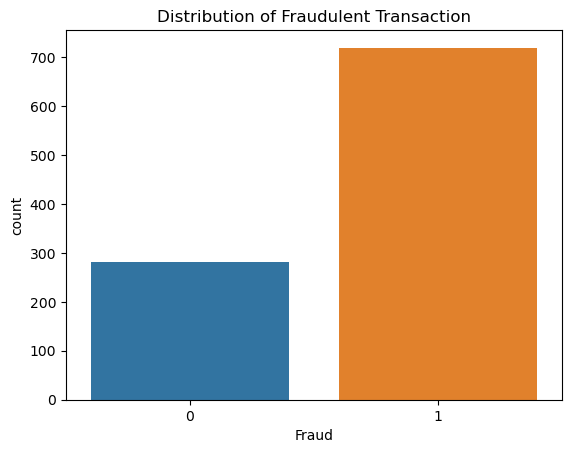

In [13]:
# Distribution of target variable
sns.countplot(x = 'Fraud', data = card)
plt.title('Distribution of Fraudulent Transaction')
plt.show()

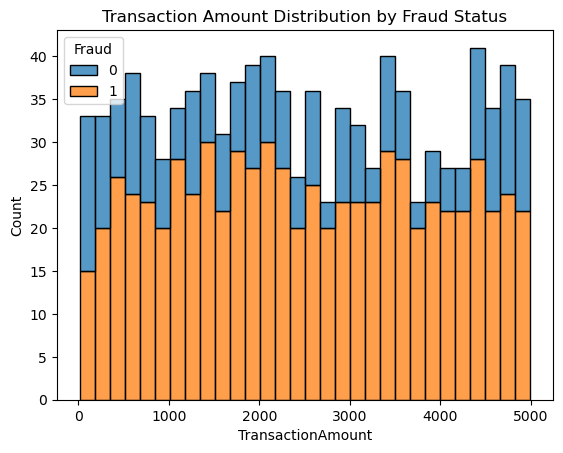

In [14]:
# Distribution of Transaction Amount by Fraud Status

sns.histplot(data=card, x = 'TransactionAmount', hue = 'Fraud', multiple = 'stack', bins = 30)
plt.title('Transaction Amount Distribution by Fraud Status')
plt.show()

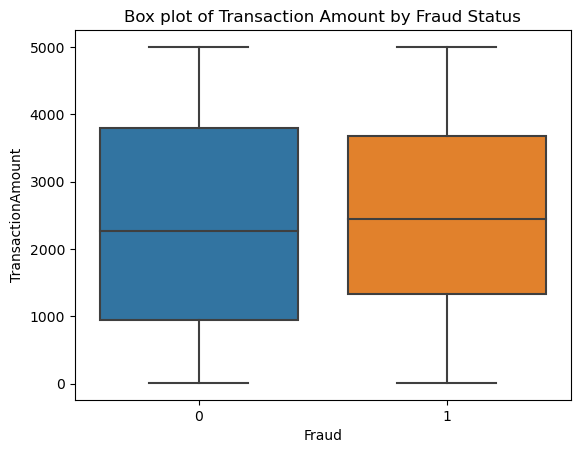

In [15]:
# Box plot for Transaction Amount by Fraud status

sns.boxplot(x = 'Fraud', y = 'TransactionAmount', data = card)
plt.title('Box plot of Transaction Amount by Fraud Status')
plt.show()

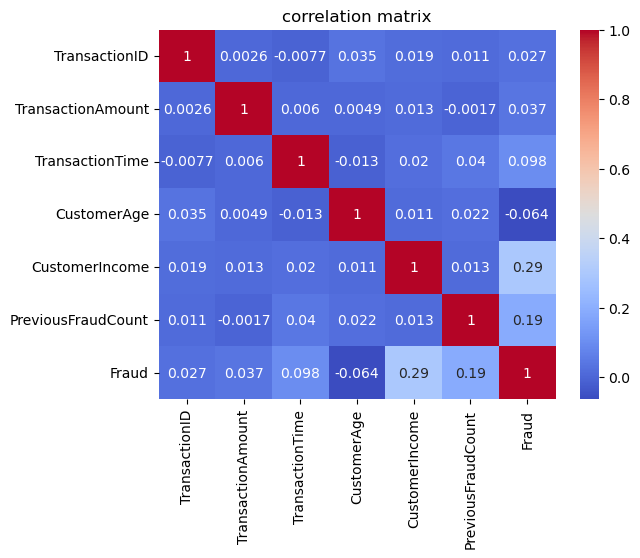

In [17]:
# Correlation matrix
num_cols = list()
for column in card.columns:
    if card[column].dtype != object:
        num_cols.append(column)
correlation_matrix = card[num_cols].corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('correlation matrix')
plt.show()

## Preprocessing

In [19]:
#Encode categorical variables
label_encoders= {}
for column in ['MerchantCategory', 'CustomerGender', 'TransactionLocation']:
    le = LabelEncoder()
    card[column]=le.fit_transform(card[column])
    label_encoders[column] = le
    
#Features and target
X = card.drop(['TransactionID', 'Fraud'], axis = 1)
y = card['Fraud']

In [20]:
X.head()

,TransactionAmount,TransactionTime,MerchantCategory,CustomerAge,CustomerGender,CustomerIncome,TransactionLocation,PreviousFraudCount
0,2748.58,14.23,3,77,0,37407,1,1
1,3578.79,0.24,3,34,1,197616,1,0
2,3017.79,11.42,3,43,0,114748,2,3
3,2728.97,17.01,3,75,0,96347,0,4
4,2124.04,1.06,0,48,1,151085,1,3


In [21]:
# Split data into tarining and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [23]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [24]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred =logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)

In [26]:
# Display accuracy and performance metrics
print(f'Logistic Regression Accuracy: {logreg_accuracy*100:.2f}')
print('\nLogistic Regression Classification Report:')
print(classification_report(y_test, logreg_pred))

Logistic Regression Accuracy: 76.00

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.29      0.42        89
           1       0.76      0.96      0.85       211

    accuracy                           0.76       300
   macro avg       0.75      0.62      0.63       300
weighted avg       0.76      0.76      0.72       300

